Problem 4

In [1]:
import numpy as np
import numpy.linalg as la
from matplotlib import pyplot as plt
import scipy.io as io

In [2]:
file = io.loadmat('mid1_p4_data.mat')

In [3]:
t = file['t'].flatten()
x = file['x'].flatten()

At this point now that we have $t$ and $x$ we can set this up as a linear least squares problem $Ac = x$
where 
$$
A = 
\begin{bmatrix}
\sin(10t_1) & t_1^2 & t_1 & 1 \\
\sin(10t_2) & t_2^2 & t_2 & 1 \\
\vdots & \vdots & \vdots & \vdots \\
\sin(10t_{1001}) & t_{1001}^2 & t_{1001} & 1
\end{bmatrix}
$$
$$
c =
\begin{bmatrix}
A \\
a \\
b \\
c
\end{bmatrix}
$$
$$ x = 
\begin{bmatrix}
x_1 \\
x_2 \\
\vdots \\
x_{1001}
\end{bmatrix}
$$

But first, let's plot the data

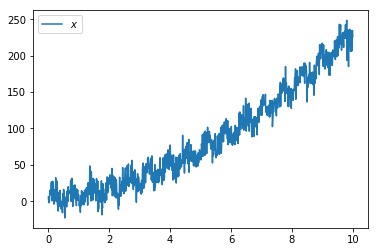

In [4]:
plt.plot(t,x,label="$x$")
plt.legend()
plt.show()

Now we construct the matrix $A$

In [5]:
t2 = t**2
sin10t = np.sin(10*t)
ones = np.ones_like(t)
A = np.column_stack([sin10t, t2, t, ones])

Now we solve for $c$ using $(A^TA)^{-1}A^Tx$

In [6]:
c = la.inv(A.T@A)@A.T@x
print(c)

[9.85567956 1.99143619 3.15668468 3.45350492]


Thus,
$$
\begin{aligned}
A &\approx 9.8556 \\
a &\approx 1.9914 \\
b &\approx 3.1566 \\
c &\approx 3.4535
\end{aligned}
$$
Let's check it to see if it makes sense

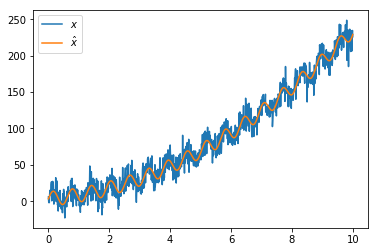

In [7]:
x_hat = A@c
plt.plot(t,x,label="$x$")
plt.plot(t,x_hat,label="$\hat{x}$")
plt.legend()
plt.show()